# Pymaceuticals Inc.
---

### Analysis

- Larger rats is strongly correlated with larger tumors
- Ramicane seems to have promising reduced max tumor size statistics 
- The most tested treatments are the most sucessful
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
print(mouse_metadata.columns)
print(study_results.columns)
print(f'shape mouse: {mouse_metadata.shape}','\n',f'shape study: {study_results.shape}')

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
shape mouse: (249, 5) 
 shape study: (1893, 4)


In [3]:
# Combine the data into a single DataFrame
mouse_study_df = mouse_metadata.merge(study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dups = mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
len(dropped_dups["Mouse ID"].unique())

249

In [8]:
dropped_dups.set_index("Drug Regimen", inplace=True)
dropped_dups.head(3)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1


In [9]:
# Checking the number of mice in the clean DataFrame.
#!!! answers says 248. Why?

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groupby = dropped_dups.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean =  drug_groupby["Tumor Volume (mm3)"].mean().rename('Mean Tumor Volume')
drug_summary = pd.DataFrame(tumor_mean, index=dropped_dups.index.unique())
drug_summary['Median Tumor Volume'] = drug_groupby["Tumor Volume (mm3)"].median()
drug_summary['Tumor Volume Variance'] = drug_groupby["Tumor Volume (mm3)"].var()
drug_summary['Tumor Volume Std. Dev.'] = drug_groupby["Tumor Volume (mm3)"].std()
drug_summary['Tumor Volume Std. Err.'] = drug_groupby["Tumor Volume (mm3)"].sem()
drug_summary.sort_index()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_summary_agg = drug_groupby["Tumor Volume (mm3)"].agg(['mean',
                                                        'median', 
                                                        'var', 
                                                        'std',
                                                        'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
count_bar = drug_groupby.count()["Mouse ID"].sort_values(ascending=False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Mouse ID, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

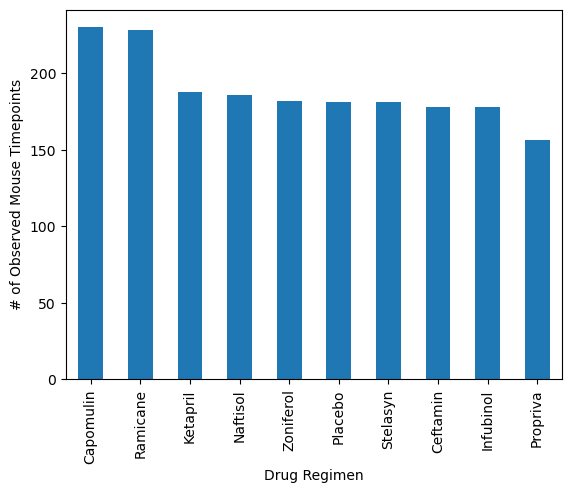

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_bar.plot(kind="bar", ylabel='# of Observed Mouse Timepoints')

In [33]:
count_bar = drug_groupby.count()["Mouse ID"].sort_values(ascending=False)

/tmp/ipykernel_53653/365730679.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=count_bar.index,rotation=90)


''

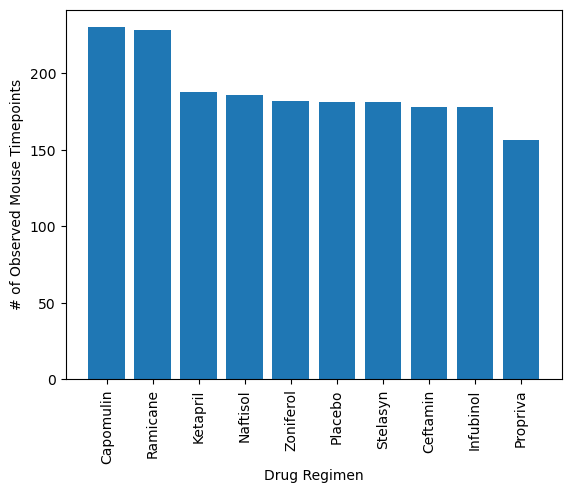

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()
ax.bar(count_bar.index, count_bar.values)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xticklabels(labels=count_bar.index,rotation=90)
;

In [16]:
gender_series = dropped_dups.groupby('Sex').count()['Mouse ID'].sort_values(ascending=False)
gender_series

Sex
Male      958
Female    930
Name: Mouse ID, dtype: int64

<Axes: ylabel='Sex'>

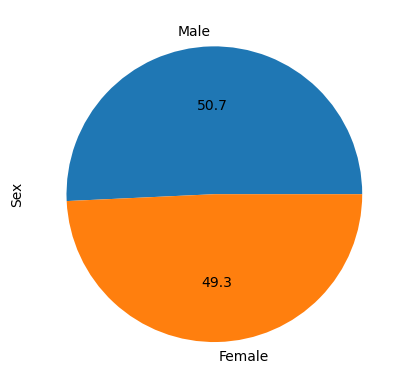

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_series.plot(kind='pie', autopct="%.1f", label='Sex')

''

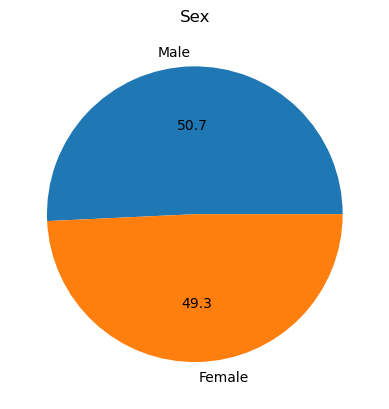

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
ax.pie(gender_series.values, autopct="%.1f", labels=gender_series.index)
ax.set_title('Sex')
;

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
promising_df = dropped_dups.reset_index()
promising_df = promising_df[promising_df['Drug Regimen'].isin(promising_treatments)]
# Start by getting the last (greatest) timepoint for each mouse
promising_df_grouped = promising_df.groupby(['Mouse ID', 'Drug Regimen'])
    # didn't work
    # promising_df_grouped.apply(lambda df: df[df['Timepoint'] == df['Timepoint'].max()])
final_tumor_size_series = promising_df_grouped.last('Timepoint')['Tumor Volume (mm3)']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_sizes = pd.DataFrame(final_tumor_size_series.reset_index())
final_tumor_sizes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [20]:
#all unique mice, use as index
len(final_tumor_sizes['Mouse ID'].unique())
final_tumor_sizes.set_index('Mouse ID', inplace=True)
final_tumor_sizes

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


''

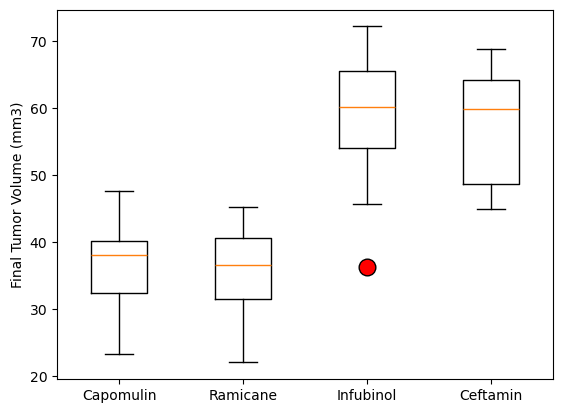

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
count, mean, std, min_tumor, first_quant, median, third_quant, max_tumor = final_tumor_size_series.describe()
iqr = third_quant - first_quant  

box_plot, ax1 = plt.subplots()

for drug in promising_treatments:
    temp_df = final_tumor_sizes[final_tumor_sizes['Drug Regimen'].eq(drug)]
    #let the box plot do the work. HW instructions for this plot are misleading
    #for row in temp_df.iterrows():
    #    tumor_size = row[1]['Tumor Volume (mm3)']
        #if (tumor_size > (median + 1.5*iqr) ) | (tumor_size < (median - 1.5*iqr)):
        #    tumor_vols_outliers.append(tumor_size)
    tumor_vols.append(temp_df['Tumor Volume (mm3)'])

flier_style = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')
ax1.boxplot(tumor_vols, labels=promising_treatments, flierprops=flier_style)
ax1.set_ylabel('Final Tumor Volume (mm3)')
;

## Line and Scatter Plots

''

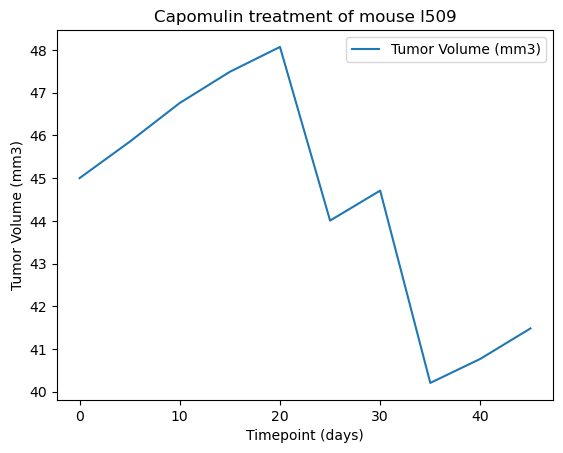

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse = dropped_dups.reset_index().set_index('Mouse ID')
single_mouse = single_mouse.loc['l509', ['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

single_mouse.plot(x='Timepoint',
                  y='Tumor Volume (mm3)',
                  kind='line', 
                  title='Capomulin treatment of mouse l509', 
                  xlabel='Timepoint (days)',
                  ylabel='Tumor Volume (mm3)')
;

''

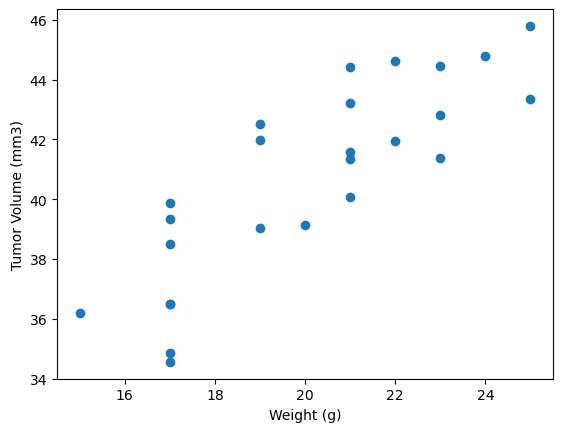

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mice = dropped_dups.reset_index().set_index('Drug Regimen')
capomulin_mice = capomulin_mice.loc['Capomulin', ['Tumor Volume (mm3)', 'Weight (g)', 'Mouse ID']].groupby('Mouse ID')
capomulin_mice = capomulin_mice.mean('Weight (g)')
# capomulin_mice.plot(x='Weight (g)',
#                        y='Tumor Volume (mm3)',
#                        kind='scatter')
# Changed to matplotlib to add a regression line
fig2, ax2 = plt.subplots()
ax2.scatter(capomulin_mice['Weight (g)'] ,capomulin_mice['Tumor Volume (mm3)'])
ax2.set_xlabel('Weight (g)')
ax2.set_ylabel('Tumor Volume (mm3)')
;

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


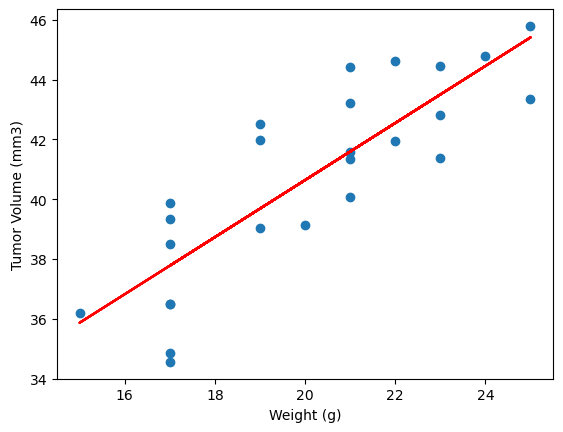

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pearson_stat = st.pearsonr(capomulin_mice['Weight (g)'], capomulin_mice['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(pearson_stat[0], 2)}')

slope, intercept, r_squ, pval, sterr = st.linregress(capomulin_mice['Weight (g)'], capomulin_mice['Tumor Volume (mm3)'])
line = slope * capomulin_mice['Weight (g)'] + intercept
ax2.plot(capomulin_mice['Weight (g)'], line, color='r')
fig2